![CAT_DOG](img/cat_dog.jpeg)

# Classifier des images de chiens et de chats avec un MLP

🎯 **Objectif du projet**

Vous devez concevoir, entraîner et évaluer un réseau de neurones de type MLP (Multilayer Perceptron) capable de distinguer des images de chiens et de chats. Ce projet vous permettra de comprendre les bases de la classification supervisée appliquée aux images, en utilisant une architecture dense simple.  

Les images des animaux se trouvent dans `data/pets`.

📝 **Recommandations techniques**
> Taille des images :
- Redimensionnez toutes les images à une taille uniforme, par exemple 64×64 pixels.
- Pour faciliter cet exercice, travaillez avec des images en niveau de gris. 
- Chaque image devra être aplatie (flatten) en un vecteur d’entrée de 4096 valeurs (64×64).
> Architecture du MLP :
- Utilisez 1 à 3 couches cachées avec des activations ReLU. Vous pouvez expérimenter d'autres fonction d'activations.
- La dernière couche doit comporter 1 seul neurone avec une activation sigmoid, car vous êtes sur une tâche de classification binaire.
> Fonction de perte :
- Utilisez impérativement la fonction binary_crossentropy, adaptée à une sortie de type sigmoid.
> Évaluation du modèle :
- Affichez la précision (accuracy) sur l’ensemble d’entraînement et de validation.
- tilisez une matrice de confusion pour analyser les erreurs.
> Prétraitement des données :
- Appliquez une normalisation des pixels (ex. : rescale=1./255) pour faciliter l’apprentissage du modèle.
> Bonnes pratiques :
- Travaillez avec un générateur d’images pour éviter de charger tout en mémoire.
- Séparez bien vos données en train / validation.
> Bonus
- Travaillez avec un générateur d’images pour éviter de charger tout en mémoire : ImageDataGenerator

In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import cv2

np.set_printoptions(linewidth=np.inf)
np.set_printoptions(edgeitems=30)
image_resize = 64

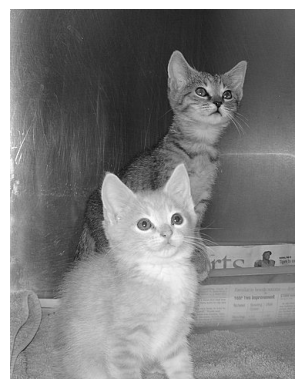

In [2]:
img = cv2.imread('data//pets/train/cat/27.jpg', cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

[[148 154 156 146 160 144 138 139 150 135 128 147 128 134 138 125 128 127 138 120  98 125 110 106 102 100 106 107  98 102 ...  89  89  86  82  92  90  89  88  87  88  90  91  92  90  90  92  93  93  95  98  95  95  96  95  93  93  93  94  98  99]
 [197 157 139 161 149 140 137 152 139 158 140 136 133 139 132 128 130 120 128 113 112 112 118 107 107 108 110 105  97  97 ...  90  93  92  89  93  92  91  90  89  90  91  92  89  88  89  92  94  93  94  97  96  95  94  93  92  94  98 101  96  98]
 [235 163 132 156 143 152 151 137 136 151 138 141 143 138 134 143 131 119 114 113 118 105 117 106 107 114 112 103  96  93 ...  89  91  89  86  91  90  89  88  88  88  89  90  88  87  88  92  93  93  93  95  94  94  94  94  94  95  98 101  96  97]
 [165 132 151 163 151 137 148 130 139 136 137 147 140 141 149 137 130 123 110 119 110 112 103 103 100 112 109  99  97  92 ...  87  88  86  82  89  88  88  88  87  87  88  88  89  88  88  91  92  92  93  95  90  93  96  97  97  95  94  93  98  99]
 [179 146 14

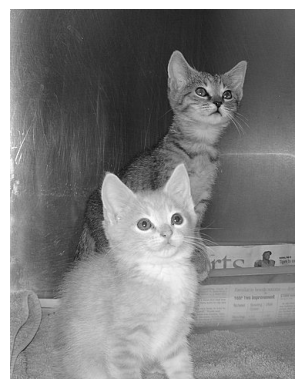

Shape (dimensions)    : (480, 370)
Type des valeurs      : uint8


In [3]:
# On charge une image depuis un chemin local, l’image est chargé en 1 canal (valeur de pixel de 0 à 255)
img = cv2.imread('data//pets/train/cat/27.jpg', cv2.IMREAD_GRAYSCALE)

# Observer l'image sous forme de matrice
print(img)

# Visualisation de l'image
plt.imshow(img, cmap="gray")
plt.axis("off")
plt.show()

# Inspection des métadonnées de l'image
print(f"Shape (dimensions)    : {img.shape}")
print(f"Type des valeurs      : {img.dtype}")

In [4]:

import warnings
warnings.filterwarnings("ignore")
def get_train_test(base_path: str):
    X = []
    y = []

    label_map = {"cat": 0, "dog": 1}

    for label in os.listdir(base_path):
        if label not in label_map:
            continue

        label_path = os.path.join(base_path, label)

        for file_name in os.listdir(label_path):
            file_path = os.path.join(label_path, file_name)
            img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
            if img is None:
                continue
            img = cv2.resize(img, (image_resize, image_resize), interpolation=cv2.INTER_CUBIC)

            X.append(img)
            y.append(label_map[label])

    X = np.array(X)
    y = np.array(y)
    return X, y


X_train, y_train = get_train_test("data/pets/train")
X_test, y_test = get_train_test("data/pets/test")


Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 226 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2230 extraneous bytes before marker 0xd9
Corrupt JPEG data: 254 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 239 extraneous bytes before marker 0xd9
Corrupt JPEG data: 399 extraneous bytes before marker 0xd9


In [5]:
print(len(X_train))

19997


In [6]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255.0
X_test /= 255.0

X_train = X_train.reshape(X_train.shape[0], image_resize * image_resize)
X_test = X_test.reshape(X_test.shape[0], image_resize * image_resize)



In [7]:
model = models.Sequential([
    layers.Input(shape=(4096,)),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [8]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │     1,048,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,090,634 (4.16 MB)

 Trainable params: 1,090,634 (4.16 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
print(X_train.shape)
print(y_train.shape)


(19997, 4096)
(19997,)


In [11]:
model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64
)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5013 - loss: 0.8156
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5705 - loss: 0.6855
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5834 - loss: 0.6736
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6041 - loss: 0.6615
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6124 - loss: 0.6570
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6202 - loss: 0.6516
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6182 - loss: 0.6527
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6326 - loss: 0.6422
Epoch 9/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6271 - loss: 0.6419
Epoch 10/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6291 - loss: 0.6383


In [12]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Accuracy sur le test : {acc*100:.2f}%")

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step - accuracy: 0.5596 - loss: 0.6739
Accuracy sur le test : 61.42%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


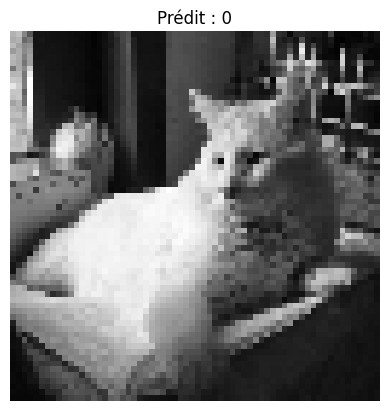

In [13]:
img_to_predict = 456
plt.imshow(X_test[img_to_predict].reshape(64, 64), cmap="gray", vmin=0, vmax=1)
plt.title(f"Prédit : {model.predict(X_test[[img_to_predict]]).argmax()}")
plt.axis('off')
plt.show()

In [14]:
import warnings
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

warnings.filterwarnings("ignore")
image_resize = 128


In [15]:
import warnings
warnings.filterwarnings("ignore")  # Ignore les warnings pour éviter les messages inutiles dans la console.

def get_train_test(base_path: str):  # Définition d'une fonction qui charge et prépare les images à partir d'un dossier.
    X = []  # Liste pour stocker les images.
    y = []  # Liste pour stocker les labels.

    label_map = {"cat": 0, "dog": 1}  # Dictionnaire associant les labels aux classes numériques.

    for label in os.listdir(base_path):  # Parcours des dossiers présents dans le répertoire de base.
        if label not in label_map:  # Vérifie que le dossier correspond bien à une classe attendue (chat ou chien).
            continue  # Si le label ne fait pas partie des classes définies, il est ignoré.

        label_path = os.path.join(base_path, label)  # Création du chemin vers le dossier contenant les images.

        for file_name in os.listdir(label_path):  # Parcours de chaque fichier dans le dossier.
            file_path = os.path.join(label_path, file_name)  # Obtention du chemin complet de l'image.
            img = cv2.imread(file_path)  # Lecture de l'image avec OpenCV.
            if img is None:  # Vérifie que l'image a bien été chargée.
                continue  # Ignore les fichiers qui ne sont pas des images valides.

            img = cv2.resize(img, (image_resize, image_resize), interpolation=cv2.INTER_CUBIC)  # Redimensionne l'image à la taille souhaitée.
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convertit l'image du format BGR (OpenCV) à RGB (standard).
            img = img / 255.0  # Normalise les pixels entre 0 et 1 pour améliorer la stabilité du modèle.

            X.append(img)  # Ajoute l'image prétraitée à la liste X.
            y.append(label_map[label])  # Ajoute le label correspondant à la liste y.

    X = np.array(X).reshape(-1, image_resize, image_resize, 3)  # Convertit la liste en tableau NumPy avec la bonne forme (nombre d'images, hauteur, largeur, canaux).
    y = np.array(y).reshape(-1, 1)  # Convertit la liste de labels en tableau NumPy.

    return X, y  # Retourne les tableaux contenant les images et leurs labels.

# Chargement des données d'entraînement et de test.
X_train, y_train = get_train_test("data/pets/train")  # Charge les images pour l'entraînement.
X_test, y_test = get_train_test("data/pets/test")  # Charge les images pour le test.

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 226 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2230 extraneous bytes before marker 0xd9
Corrupt JPEG data: 254 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 239 extraneous bytes before marker 0xd9
Corrupt JPEG data: 399 extraneous bytes before marker 0xd9


In [16]:
from keras.src.metrics.metrics_utils import confusion_matrix
from keras.src.optimizers import Adam
from tensorflow.keras.regularizers import l2

# Création du modèle CNN optimisé
model = Sequential([
    Input(shape=(128, 128, 3)),  # Définition de l'entrée du modèle : images RGB de 128x128 pixels.

    Conv2D(32, (3,3), activation='relu', padding="same"),  # Première couche de convolution avec padding pour conserver la taille originale.
    MaxPooling2D(pool_size=(2,2)),  # Réduction de la taille avec pooling.

    Conv2D(64, (3,3), activation='relu', padding="same"),  # Deuxième couche convolutionnelle avec plus de filtres.
    MaxPooling2D(pool_size=(2,2)),  # Pooling pour réduire encore les dimensions.

    Conv2D(128, (3,3), activation='relu', padding="same"),  # Troisième couche pour capturer des caractéristiques plus complexes.
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(256, (3,3), activation='relu', padding="same"),  # Quatrième couche plus profonde pour capturer plus de détails.
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),  # Transformation des matrices en un vecteur.

    Dense(512, activation='relu', kernel_regularizer=l2(0.01)),  # Couche dense plus large (128 → 512 neurones) avec régularisation L2.
    Dropout(0.5),  # Régularisation pour éviter le surajustement.

    Dense(256, activation='relu'),  # Ajout d’une couche intermédiaire pour mieux structurer les caractéristiques.
    Dropout(0.3),  # Dropout réduit à 30% pour éviter le surajustement.

    Dense(1, activation='sigmoid')  # Couche de sortie sigmoïde pour classifier les images en chat (0) ou chien (1).
])

# Définition de l'optimiseur Adam avec un learning rate réduit pour une meilleure convergence
optimizer = Adam(learning_rate=0.0001)

# Compilation du modèle avec la fonction de coût binaire et la mesure de précision
model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])

print("Modèle CNN optimisé créé avec succès")

# Entraînement du modèle avec les données d'entraînement et de validation
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),  # Évaluation du modèle à chaque époque sur les données de test.
    epochs=10,  # Augmentation du nombre d'époques pour améliorer l'apprentissage.
    batch_size=32  # Réduction du batch size pour des ajustements de poids plus fréquents.
)

print("Entraînement terminé avec succès")

# Récupération des meilleures performances atteintes pendant l'entraînement
meilleure_accuracy_train = max(history.history['accuracy'])
meilleure_accuracy_val = max(history.history['val_accuracy'])

print(f"Meilleure accuracy (train) : {meilleure_accuracy_train}")
print(f"Meilleure accuracy (validation) : {meilleure_accuracy_val}")


Modèle CNN optimisé créé avec succès
Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 73s 117ms/step - accuracy: 0.5517 - loss: 3.5847 - val_accuracy: 0.7386 - val_loss: 0.5654
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 76s 121ms/step - accuracy: 0.7224 - loss: 0.5767 - val_accuracy: 0.7659 - val_loss: 0.5219
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 73s 116ms/step - accuracy: 0.7559 - loss: 0.5313 - val_accuracy: 0.7858 - val_loss: 0.4971
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 75s 120ms/step - accuracy: 0.7756 - loss: 0.5037 - val_accuracy: 0.7354 - val_loss: 0.5560
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 75s 120ms/step - accuracy: 0.8076 - loss: 0.4648 - val_accuracy: 0.8152 - val_loss: 0.4557
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 74s 118ms/step - accuracy: 0.8277 - loss: 0.4268 - val_accuracy: 0.8255 - val_loss: 0.4233
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 75s 119ms/step - accuracy: 0.8389 - loss: 0.4073 - val_accuracy: 0.8411 - val_loss: 0.4008
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 76s 12

78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - accuracy: 0.8468 - loss: 0.4098
Loss sur les données de test : 0.3305376172065735
Accuracy sur les données de test : 0.8796389102935791
156/156 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step


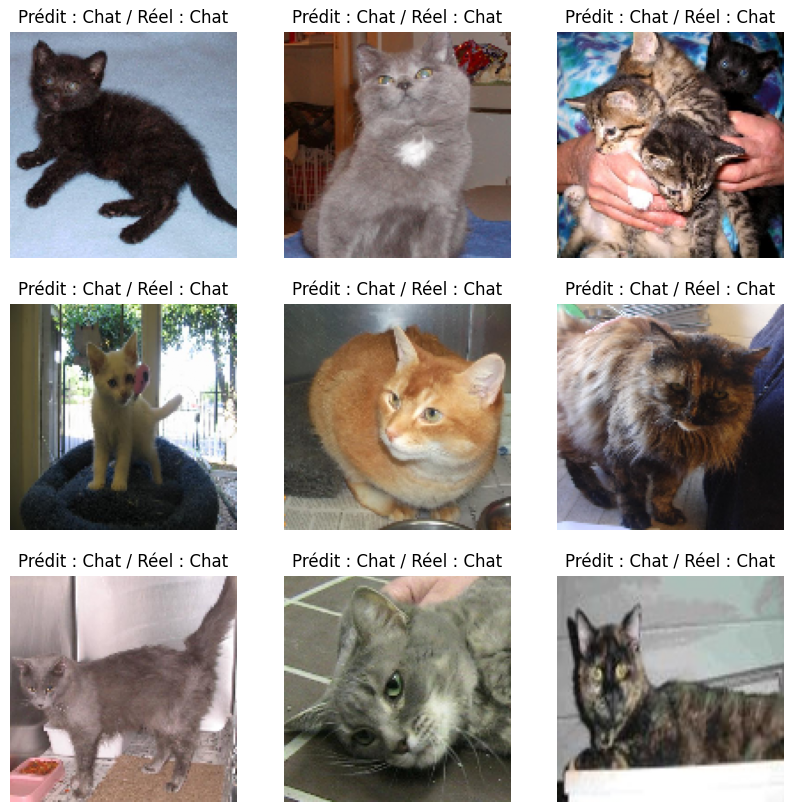

In [22]:
# Évaluation du modèle sur les données de test
# Cette étape permet de calculer la perte (loss) et l'accuracy sur l'ensemble de test.
# Le batch_size est défini à 64, ce qui signifie que les images seront évaluées par groupe de 64.
test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=64)

# Affichage des performances sur l'ensemble de test
# On affiche la valeur de la perte et la précision du modèle.
print(f"Loss sur les données de test : {test_loss}")  # Affiche la fonction de coût sur les données de test.
print(f"Accuracy sur les données de test : {test_accuracy}")  # Affiche la précision du modèle.

# Prédictions sur l'ensemble de test
# Le modèle prédit une probabilité entre 0 et 1 pour chaque image.
y_pred = model.predict(X_test)

# Conversion des probabilités en classes binaires (0 = chat, 1 = chien)
# Seuil fixé à 0.9 pour être plus strict dans la classification et minimiser les erreurs.
y_pred_classes = (y_pred > 0.9).astype("int")

# Affichage des quelques prédictions avec les vraies étiquettes
import numpy as np
import matplotlib.pyplot as plt

# Création d'un affichage en grille 3x3 pour montrer quelques images de test et leurs prédictions.
fig, axes = plt.subplots(3, 3, figsize=(10, 10))  # Définit une grille de 3x3 pour afficher 9 images.
axes = axes.ravel()  # Convertit les axes en une liste pour simplifier l'indexation.

for i in range(9):  # Boucle pour afficher 9 images du jeu de test.
    axes[i].imshow(X_test[i])  # Affiche l'image de test.
    axes[i].axis("off")  # Supprime les axes pour un affichage propre.

    # Vérifie si la prédiction correspond à la vérité terrain.
    label = "Chien" if y_pred_classes[i] == 1 else "Chat"
    true_label = "Chien" if y_test[i] == 1 else "Chat"

    # Affichage du titre de l'image indiquant la prédiction et la réalité.
    axes[i].set_title(f"Prédit : {label} / Réel : {true_label}")

# Affichage de la figure avec les images et leurs étiquettes.
plt.show()

78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - accuracy: 0.8468 - loss: 0.4098
Loss sur les données de test : 0.3305376172065735
Accuracy sur les données de test : 0.8796389102935791
156/156 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step


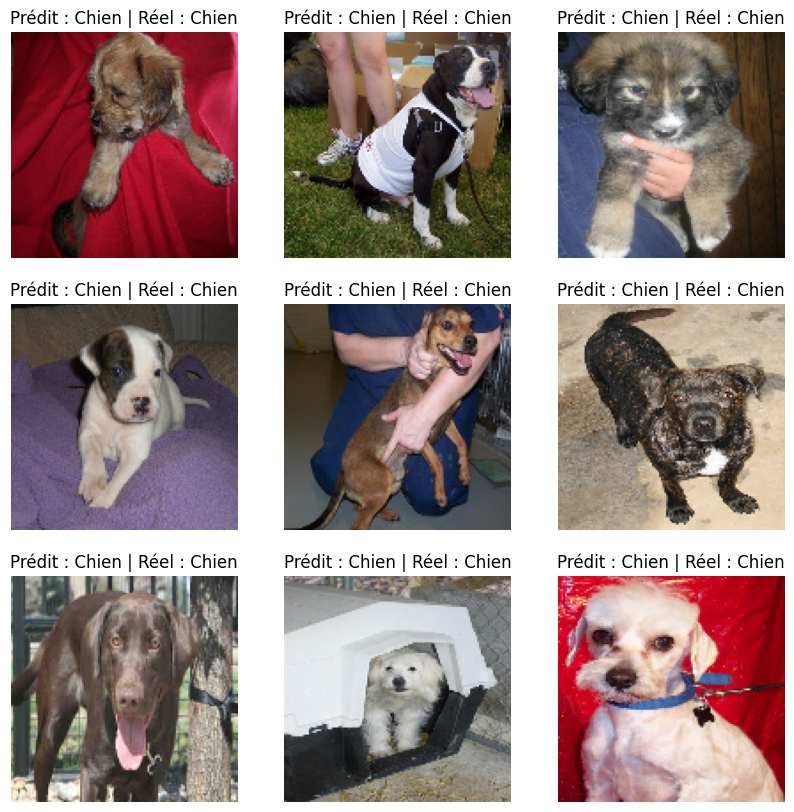

In [29]:
# Évaluation du modèle sur les données de test
test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=64)

# Affichage des performances sur l'ensemble de test
print(f"Loss sur les données de test : {test_loss}")
print(f"Accuracy sur les données de test : {test_accuracy}")

# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Conversion des probabilités en classes binaires (0 = chat, 1 = chien)
y_pred_classes = (y_pred > 0.5).astype("int")  # Seuil ajusté à 0.5

# Sélectionner uniquement les images prédites comme chiens ET qui sont réellement des chiens
indices_chiens = np.where((y_pred_classes == 1) & (y_test == 1))[0]

# Vérifier si des chiens ont été détectés
if len(indices_chiens) == 0:
    print("⚠ Aucun chien détecté avec le seuil actuel.")
else:
    # Affichage des images prédites comme "Chien"
    fig, axes = plt.subplots(3, 3, figsize=(10, 10))
    axes = axes.ravel()

    # Sélectionner jusqu'à 9 chiens pour affichage
    for i in range(min(len(indices_chiens), 9)):
        idx = indices_chiens[i]
        axes[i].imshow(X_test[idx])  # Affichage de l'image
        axes[i].axis("off")

        label = "Chien" if y_pred_classes[idx] == 1 else "Chat"
        true_label = "Chien" if y_test[idx] == 1 else "Chat"

        axes[i].set_title(f"Prédit : {label} | Réel : {true_label}")

    # Masquer les cases vides si moins de 9 images sont affichées
    for i in range(len(indices_chiens), 9):
        axes[i].axis("off")

    plt.show()
